In [1]:
import numpy as np
import scipy.ndimage as spi
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import simcado as sim

# Is betelgeuse visible with MICADO?

Discussed during CM#7 at the science team meeting

Let's create a circle to represent Betelgeuse

749.0

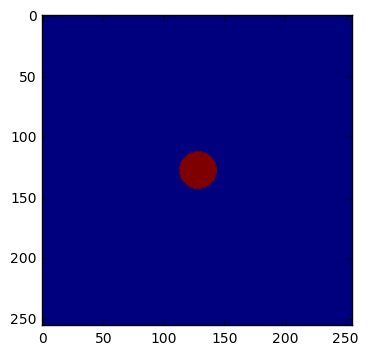

In [12]:
pix_res = 1.5 # mas
x_cen, y_cen = 128, 128 # pixel
im_w = 256 # pixel

# The diameter of Betelgeuse is ~45 mas
# Zoom mode has 1.5 mas pixels
pix_res = 1.5 # mas
rad = 23 / pix_res # mas

y,x = np.ogrid[-x_cen:im_w-x_cen, -y_cen:im_w-y_cen]
mask = x*x + y*y <= rad*rad

# perfect "image" of betelgeuse
array = np.zeros((im_w, im_w))
array[mask] = 1

plt.imshow(array)

np.sum(array)

Now lets assign a M2I spectrum to it at it's real magnitude: Ks=-4.

We then need to divide the spectrum intensity by the number of pixels that Betelgeuse will take up on the sky

In [13]:
lam, spec = sim.source.SED("M2III", "Ks", -4)
spec /= np.sum(array)
betel = sim.source.source_from_image(array, lam, spec, 0.0015)

### Exposure time

The readout speed is 2 MHz, so it we assume reading a window of 100x100 pixels, we are looking at an exposure time of 

    OBS_DIT = (100px)^2 / 2MHz = 5ms
    

### Filters
We also assume a 0.1% Neutral Densitiy filter and a narrow band filter with 30nm width

The contents of the file given to `INST_FILTER_TC="TC_filter_K_ND_narrow.dat"` is:
```
TC_filter_K_ND_narrow.dat ....

# wave [um]  trans
0.3          0
2.2          0
2.201        0.001
2.23         0.001
2.231        0
3            0
```

In [14]:
hdu = sim.run(betel, mode="zoom",
              INST_FILTER_TC="./TC_filter_K_ND_narrow.dat", 
              OBS_DIT=0.005,
              FPA_LINEARITY_CURVE=None)

Using PSF: C:\Program Files\Anaconda3\lib\site-packages\simcado\data\PSF_SCAO.fits
 id x_cen y_cen x_len y_len
--- ----- ----- ----- -----
  0     0     0  1024  1024
Creating 1 layer(s) per chip
1 chip(s) will be simulated
Chip ID: 0 - Creating layer between [um]: 2.199 2.232
Reading out chip 0


Max value 9962.5


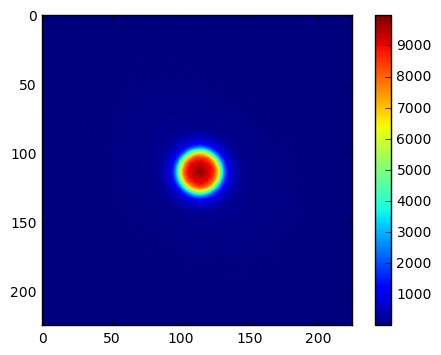

In [15]:
plt.imshow(hdu[0].data[400:625, 400:625])
plt.colorbar()
print("Max value", np.max(hdu[0].data))

## Assumptions to make Betelgeuse observable

* Fast read out over 100x100 pixels - 5 ms readout
* 0.1 % ND filter
* 30nm narrow band filter
* Zoom mode (1.5mas)